In [3]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# 파일 불러오기
all = pd.read_excel("./xlsx/Join_data3.xlsx", index_col = 0)    
all.drop([0], axis=0, inplace=True)

# 컬럼 추출
all2 = all[['DateTime', '종가_ex','1Y_전일비_irs', '2Y_전일비_irs', '3Y_전일비_irs',
        '5Y_전일비_irs', '10Y_전일비_irs',  '1Y_전일비_crs', '2Y_전일비_crs','3Y_전일비_crs','5Y_전일비_crs','10Y_전일비_crs',
        '국고1년', '국고3년', '국고5년','국고10년', '통안364일', '통안2년', 'Mid_ndf',
        'M1_스왑포인트']]            # [[]] 대괄호 2개 사용 -> 데이터 프레임형태로 나옴

        
all2 = all2.set_index("DateTime")


all2['대비_국고1년'] = all2['국고1년']-all2['국고1년'].shift(1)
all2['대비_국고3년'] = all2['국고3년']-all2['국고3년'].shift(1)
all2['대비_국고5년'] = all2['국고5년']-all2['국고5년'].shift(1)
all2['대비_국고10년'] = all2['국고10년']-all2['국고10년'].shift(1)
all2['대비_통안1년'] = all2['통안364일']-all2['통안364일'].shift(1)
all2['대비_통안2년'] = all2['통안364일']-all2['통안364일'].shift(1)
all2['대비_ndf'] = all2['Mid_ndf']-all2['Mid_ndf'].shift(1)
all2['스왑포인트_1월물'] = all2["M1_스왑포인트"]/100 
all2['전일종가_ex'] = all2['종가_ex'].shift(1)

# all2['대비_종가_ex'] = all2['종가_ex']-all2['종가_ex'].shift(1)

all2.rename({"1Y_전일비_irs" : "1Y_대비_irs", "2Y_전일비_irs" : "2Y_대비_irs", "3Y_전일비_irs" : "3Y_대비_irs", "5Y_전일비_irs" : "5Y_대비_irs", "10Y_전일비_irs" : "10Y_대비_irs",
            "1Y_전일비_crs" : "1Y_대비_crs", "2Y_전일비_crs" : "2Y_대비_crs", "3Y_전일비_crs" : "3Y_대비_crs", "5Y_전일비_crs" : "5Y_대비_crs", "10Y_전일비_crs" : "10Y_대비_crs"}, axis=1, inplace=True)

all2 = all2.dropna()

# 필요 칼럼만 남기기
df = all2.copy()
df = all2[["종가_ex", 
            '1Y_대비_irs', '2Y_대비_irs', '3Y_대비_irs', '5Y_대비_irs', '10Y_대비_irs', 
            '1Y_대비_crs', '2Y_대비_crs', '3Y_대비_crs', '5Y_대비_crs', '10Y_대비_crs', 
            "대비_국고1년", "대비_국고3년", "대비_국고5년", "대비_국고10년", "대비_통안1년", "대비_통안2년",
            "대비_ndf", "스왑포인트_1월물", "전일종가_ex"]] # , "전일종가_ex"

# DateTime을 인덱스로 바꿔주기
df

,종가_ex,1Y_대비_irs,2Y_대비_irs,3Y_대비_irs,5Y_대비_irs,10Y_대비_irs,1Y_대비_crs,2Y_대비_crs,3Y_대비_crs,5Y_대비_crs,10Y_대비_crs,대비_국고1년,대비_국고3년,대비_국고5년,대비_국고10년,대비_통안1년,대비_통안2년,대비_ndf,스왑포인트_1월물,전일종가_ex
DateTime,,,,,,,,,,,,,,,,,,,,
2012-08-03,1134.8,-0.03,-0.03,-0.03,-0.03,-0.02,-0.01,-0.015,-0.02,-0.08,-0.15,-0.02,-0.02,-0.07,-0.07,-0.02,-0.02,4.00,2.40,1131.7
2012-08-06,1129.0,0.02,0.02,0.02,0.02,0.01,0.00,-0.025,-0.03,-0.04,-0.04,0.01,0.01,0.00,0.00,0.01,0.01,-9.50,2.40,1134.8
2012-08-07,1128.8,0.01,0.00,0.00,0.01,0.02,0.02,0.015,0.00,-0.07,-0.08,-0.01,0.00,0.00,0.00,-0.01,-0.01,0.50,2.50,1129.0
2012-08-08,1128.3,0.01,0.02,0.02,0.02,0.03,0.01,0.000,0.00,-0.02,-0.04,-0.01,-0.02,-0.02,-0.02,-0.01,-0.01,1.25,2.40,1128.8
2012-08-09,1125.5,0.05,0.06,0.06,0.05,0.04,0.09,0.040,0.04,0.04,0.04,0.05,0.06,0.05,0.05,0.04,0.04,2.25,2.35,1128.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,1313.7,-0.04,-0.08,-0.07,-0.09,-0.11,-0.08,-0.090,-0.07,-0.11,-0.11,-0.02,-0.06,-0.07,-0.09,-0.01,-0.01,3.35,-0.60,1313.0
2022-07-26,1307.6,-0.01,-0.02,-0.03,-0.03,-0.03,0.01,-0.030,-0.03,-0.02,-0.02,0.01,-0.03,-0.02,-0.03,0.01,0.01,1.15,-0.70,1313.7
2022-07-27,1313.3,-0.01,-0.05,-0.06,-0.06,-0.06,0.01,-0.010,-0.01,-0.01,-0.01,0.00,-0.03,-0.05,-0.06,0.02,0.02,-0.50,-0.55,1307.6


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


[Text(0, 0.5, '종가_ex'),
 Text(0, 1.5, '1Y_대비_irs'),
 Text(0, 2.5, '2Y_대비_irs'),
 Text(0, 3.5, '3Y_대비_irs'),
 Text(0, 4.5, '5Y_대비_irs'),
 Text(0, 5.5, '10Y_대비_irs'),
 Text(0, 6.5, '1Y_대비_crs'),
 Text(0, 7.5, '2Y_대비_crs'),
 Text(0, 8.5, '3Y_대비_crs'),
 Text(0, 9.5, '5Y_대비_crs'),
 Text(0, 10.5, '10Y_대비_crs'),
 Text(0, 11.5, '대비_국고1년'),
 Text(0, 12.5, '대비_국고3년'),
 Text(0, 13.5, '대비_국고5년'),
 Text(0, 14.5, '대비_국고10년'),
 Text(0, 15.5, '대비_통안1년'),
 Text(0, 16.5, '대비_통안2년'),
 Text(0, 17.5, '대비_ndf'),
 Text(0, 18.5, '스왑포인트_1월물'),
 Text(0, 19.5, '전일종가_ex')]

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


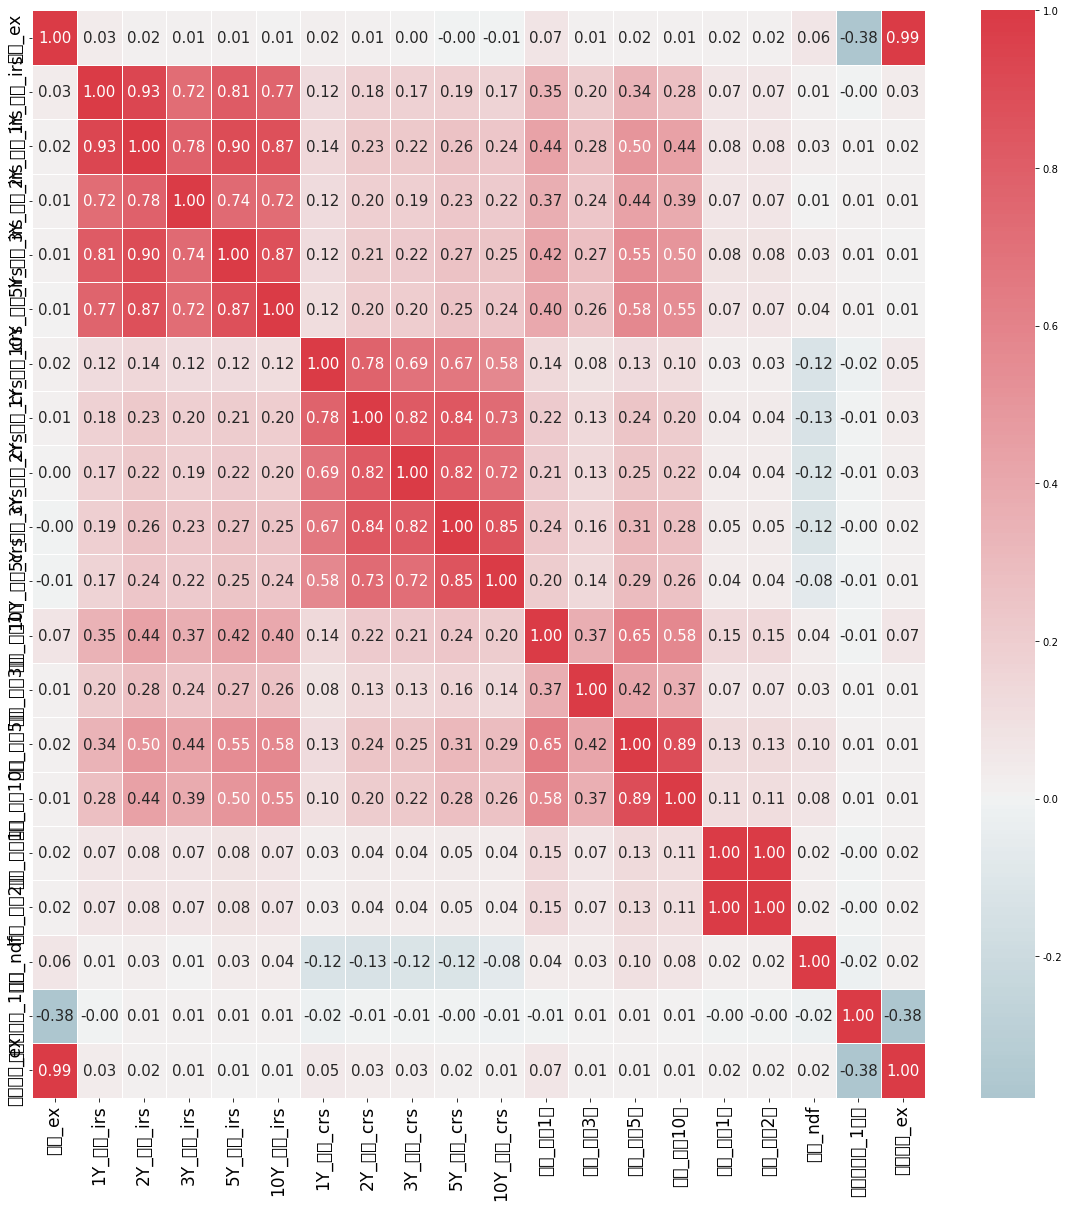

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
res = sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0.0, annot_kws = {'size' : 15})


res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 17)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 17)

In [5]:
from sklearn.preprocessing import StandardScaler

x = df[['1Y_대비_irs', '2Y_대비_irs', '3Y_대비_irs', '5Y_대비_irs', '10Y_대비_irs', 
          '1Y_대비_crs', '2Y_대비_crs', '3Y_대비_crs', '5Y_대비_crs', '10Y_대비_crs', 
          "대비_국고1년", "대비_국고3년", "대비_국고5년", "대비_국고10년", "대비_통안1년", "대비_통안2년",
           "대비_ndf", "스왑포인트_1월물", "전일종가_ex"]] # , "전일종가_ex"
y = df[["종가_ex"]]
x.feature = x.columns 

# StandardScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)
x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정
x_scaled

,1Y_대비_irs,2Y_대비_irs,3Y_대비_irs,5Y_대비_irs,10Y_대비_irs,1Y_대비_crs,2Y_대비_crs,3Y_대비_crs,5Y_대비_crs,10Y_대비_crs,대비_국고1년,대비_국고3년,대비_국고5년,대비_국고10년,대비_통안1년,대비_통안2년,대비_ndf,스왑포인트_1월물,전일종가_ex
DateTime,,,,,,,,,,,,,,,,,,,
2012-08-03,-0.848159,-0.731938,-0.562641,-0.628439,-0.403644,-0.205379,-0.364044,-0.462614,-1.872301,-3.114970,-1.133777,-0.324094,-1.890723,-1.798842,-0.217667,-0.217667,0.686282,1.820638,-0.056282
2012-08-06,0.559997,0.481950,0.370979,0.415773,0.202253,-0.003127,-0.602217,-0.690720,-0.939235,-0.832887,0.563092,0.159979,0.000440,-0.000209,0.107313,0.107313,-1.668663,1.820638,-0.000487
2012-08-07,0.278366,-0.003605,-0.002469,0.206931,0.404219,0.401378,0.350478,-0.006403,-1.639035,-1.662735,-0.568154,-0.001379,0.000440,-0.000209,-0.109340,-0.109340,0.075741,1.911215,-0.104877
2012-08-08,0.278366,0.481950,0.370979,0.415773,0.606184,0.199126,-0.006783,-0.006403,-0.472702,-0.832887,-0.568154,-0.324094,-0.539892,-0.514104,-0.109340,-0.109340,0.206571,1.820638,-0.108476
2012-08-09,1.404890,1.453061,1.117875,1.042301,0.808150,1.817145,0.945913,0.906019,0.926898,0.826810,2.825583,0.966767,1.351270,1.284529,0.432293,0.432293,0.381012,1.775350,-0.117475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,-1.129790,-1.945827,-1.309537,-1.881494,-2.221333,-1.621146,-2.150347,-1.603142,-2.572101,-2.285122,-1.133777,-0.969524,-1.890723,-2.312737,-0.109340,-0.109340,0.572896,-0.896666,3.206786
2022-07-26,-0.284897,-0.489161,-0.562641,-0.628439,-0.605609,0.199126,-0.721304,-0.690720,-0.472702,-0.417963,0.563092,-0.485451,-0.539892,-0.771052,0.107313,0.107313,0.189127,-0.987243,3.219385
2022-07-27,-0.284897,-1.217494,-1.122813,-1.254966,-1.211506,0.199126,-0.244957,-0.234509,-0.239435,-0.210501,-0.002531,-0.485451,-1.350390,-1.541894,0.215640,0.215640,-0.098699,-0.851378,3.109596


In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     9.964552   1Y_대비_irs
1    19.492515   2Y_대비_irs
2     2.663084   3Y_대비_irs
3     6.465522   5Y_대비_irs
4     5.870293  10Y_대비_irs
5     2.653830   1Y_대비_crs
6     5.271793   2Y_대비_crs
7     3.829948   3Y_대비_crs
8     6.706808   5Y_대비_crs
9     3.721057  10Y_대비_crs
10    1.896315     대비_국고1년
11    1.252797     대비_국고3년
12    6.261849     대비_국고5년
13    5.054789    대비_국고10년
14         inf     대비_통안1년
15         inf     대비_통안2년
16    1.043731      대비_ndf
17    1.169533   스왑포인트_1월물
18    1.182377     전일종가_ex


In [7]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.731e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:10:35   Log-Likelihood:                -7396.8
No. Observations:                2458   AIC:                         1.483e+04
Df Residuals:                    2439   BIC:                         1.494e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.099   1.14e+04      0.000    1134.700    1135.090
1Y_대비_irs      0.1543      0.314      0.492      0.623      -0.461       0.769
2Y_대비_irs      0.4651      0.439      1.061      0.289      -0.395       1.325
3Y_대비_irs      0.0977      0.162      0.602      0.547      -0.220       0.416
5Y_대비_irs     -0.3033      0.253     -1.201      0.230      -0.799       0.192
10Y_대비_irs    -0.4589      0.241     -1.907      0.057      -0.931       0.013
1Y_대비_crs     -1.0212      0.162     -6.311      0.000      -1.338      -0.704
2Y_대비_crs     -0.0416      0.228     -0.182      0.855      -0.489       0.406
3Y_대비_crs     -0.3812      0.194     -1.961      0.050      -0.762     3.2e-05
5Y_대비_crs      0.0687      0.257      0.267      0.790      -0.436       0.573
10Y_대비_crs     0.0121      0.192      0.063      0.950      -0.364       0.388
대비_국고1년        0.1803      0.137      1.318      0.188      -0.088       0.448
대비_국고3년       -0.2634      0.111     -2.369      0.018      -0.481      -0.045
대비_국고5년        0.5482      0.249      2.205      0.028       0.061       1.036
대비_국고10년      -0.1294      0.223     -0.579      0.562      -0.567       0.309
대비_통안1년       -0.0202      0.050     -0.402      0.688      -0.119       0.078
대비_통안2년       -0.0202      0.050     -0.402      0.688      -0.119       0.078
대비_ndf         2.3953      0.101     23.604      0.000       2.196       2.594
스왑포인트_1월물     -0.1132      0.107     -1.054      0.292      -0.324       0.097
전일종가_ex       55.3187      0.108    512.177      0.000      55.107      55.531
==============================================================================
Omnibus:                       50.173   Durbin-Watson:                   2.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.857
Skew:                           0.044   Prob(JB):                     2.80e-23
Kurtosis:                       4.003   Cond. No.                     1.51e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.74e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [8]:
x_scaled.drop(['2Y_대비_irs'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.928111   1Y_대비_irs
1     2.552167   3Y_대비_irs
2     5.801031   5Y_대비_irs
3     5.217576  10Y_대비_irs
4     2.650912   1Y_대비_crs
5     5.260297   2Y_대비_crs
6     3.827464   3Y_대비_crs
7     6.701217   5Y_대비_crs
8     3.720916  10Y_대비_crs
9     1.884435     대비_국고1년
10    1.246697     대비_국고3년
11    6.172823     대비_국고5년
12    5.040938    대비_국고10년
13         inf     대비_통안1년
14         inf     대비_통안2년
15    1.043462      대비_ndf
16    1.169463   스왑포인트_1월물
17    1.181591     전일종가_ex


In [9]:
x_scaled.drop(['대비_통안2년'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.928111   1Y_대비_irs
1     2.552167   3Y_대비_irs
2     5.801031   5Y_대비_irs
3     5.217576  10Y_대비_irs
4     2.650912   1Y_대비_crs
5     5.260297   2Y_대비_crs
6     3.827464   3Y_대비_crs
7     6.701217   5Y_대비_crs
8     3.720916  10Y_대비_crs
9     1.884435     대비_국고1년
10    1.246697     대비_국고3년
11    6.172823     대비_국고5년
12    5.040938    대비_국고10년
13    1.025011     대비_통안1년
14    1.043462      대비_ndf
15    1.169463   스왑포인트_1월물
16    1.181591     전일종가_ex


In [10]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.833e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:10:43   Log-Likelihood:                -7397.4
No. Observations:                2458   AIC:                         1.483e+04
Df Residuals:                    2440   BIC:                         1.494e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.099   1.14e+04      0.000    1134.700    1135.090
1Y_대비_irs      0.4131      0.197      2.099      0.036       0.027       0.799
3Y_대비_irs      0.1327      0.159      0.836      0.403      -0.178       0.444
5Y_대비_irs     -0.2175      0.239     -0.909      0.363      -0.687       0.252
10Y_대비_irs    -0.3738      0.227     -1.647      0.100      -0.819       0.071
1Y_대비_crs     -1.0269      0.162     -6.349      0.000      -1.344      -0.710
2Y_대비_crs     -0.0303      0.228     -0.133      0.894      -0.477       0.416
3Y_대비_crs     -0.3864      0.194     -1.988      0.047      -0.767      -0.005
5Y_대비_crs      0.0766      0.257      0.298      0.766      -0.428       0.581
10Y_대비_crs     0.0134      0.192      0.070      0.944      -0.362       0.389
대비_국고1년        0.1917      0.136      1.406      0.160      -0.076       0.459
대비_국고3년       -0.2552      0.111     -2.301      0.021      -0.473      -0.038
대비_국고5년        0.5796      0.247      2.349      0.019       0.096       1.064
대비_국고10년      -0.1418      0.223     -0.636      0.525      -0.579       0.296
대비_통안1년       -0.0424      0.101     -0.422      0.673      -0.240       0.155
대비_ndf         2.3970      0.101     23.623      0.000       2.198       2.596
스왑포인트_1월물     -0.1124      0.107     -1.046      0.296      -0.323       0.098
전일종가_ex       55.3158      0.108    512.307      0.000      55.104      55.528
==============================================================================
Omnibus:                       50.632   Durbin-Watson:                   2.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.908
Skew:                           0.048   Prob(JB):                     1.66e-23
Kurtosis:                       4.008   Cond. No.                         7.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
x_scaled.drop(['3Y_대비_irs', '5Y_대비_crs', '대비_통안1년'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.607597   1Y_대비_irs
1     5.673876   5Y_대비_irs
2     5.097719  10Y_대비_irs
3     2.648965   1Y_대비_crs
4     4.577110   2Y_대비_crs
5     3.455056   3Y_대비_crs
6     2.433423  10Y_대비_crs
7     1.868985     대비_국고1년
8     1.245707     대비_국고3년
9     6.156517     대비_국고5년
10    5.040269    대비_국고10년
11    1.040713      대비_ndf
12    1.169444   스왑포인트_1월물
13    1.181253     전일종가_ex


In [12]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.227e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:10:47   Log-Likelihood:                -7397.9
No. Observations:                2458   AIC:                         1.483e+04
Df Residuals:                    2443   BIC:                         1.491e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.099   1.14e+04      0.000    1134.700    1135.090
1Y_대비_irs      0.4555      0.189      2.416      0.016       0.086       0.825
5Y_대비_irs     -0.1861      0.237     -0.787      0.431      -0.650       0.278
10Y_대비_irs    -0.3426      0.224     -1.528      0.127      -0.782       0.097
1Y_대비_crs     -1.0310      0.162     -6.380      0.000      -1.348      -0.714
2Y_대비_crs     -0.0019      0.212     -0.009      0.993      -0.418       0.415
3Y_대비_crs     -0.3698      0.185     -2.004      0.045      -0.732      -0.008
10Y_대비_crs     0.0512      0.155      0.331      0.741      -0.253       0.355
대비_국고1년        0.1924      0.136      1.417      0.156      -0.074       0.459
대비_국고3년       -0.2528      0.111     -2.282      0.023      -0.470      -0.036
대비_국고5년        0.5852      0.246      2.375      0.018       0.102       1.068
대비_국고10년      -0.1433      0.223     -0.643      0.520      -0.580       0.294
대비_ndf         2.3931      0.101     23.626      0.000       2.194       2.592
스왑포인트_1월물     -0.1124      0.107     -1.046      0.295      -0.323       0.098
전일종가_ex       55.3140      0.108    512.576      0.000      55.102      55.526
==============================================================================
Omnibus:                       50.777   Durbin-Watson:                   2.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.451
Skew:                           0.047   Prob(JB):                     1.26e-23
Kurtosis:                       4.010   Cond. No.                         6.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
x_scaled.drop(['10Y_대비_crs', '5Y_대비_irs', '스왑포인트_1월물'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     2.800109   1Y_대비_irs
1     3.617995  10Y_대비_irs
2     2.645797   1Y_대비_crs
3     4.177014   2Y_대비_crs
4     3.141441   3Y_대비_crs
5     1.864163     대비_국고1년
6     1.244644     대비_국고3년
7     6.088248     대비_국고5년
8     5.038234    대비_국고10년
9     1.040132      대비_ndf
10    1.011158     전일종가_ex


In [14]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.836e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:10:51   Log-Likelihood:                -7398.8
No. Observations:                2458   AIC:                         1.482e+04
Df Residuals:                    2446   BIC:                         1.489e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.099   1.14e+04      0.000    1134.701    1135.090
1Y_대비_irs      0.3833      0.166      2.308      0.021       0.058       0.709
10Y_대비_irs    -0.4343      0.189     -2.300      0.022      -0.805      -0.064
1Y_대비_crs     -1.0264      0.161     -6.357      0.000      -1.343      -0.710
2Y_대비_crs      0.0150      0.203      0.074      0.941      -0.383       0.413
3Y_대비_crs     -0.3541      0.176     -2.012      0.044      -0.699      -0.009
대비_국고1년        0.1871      0.136      1.381      0.167      -0.079       0.453
대비_국고3년       -0.2554      0.111     -2.306      0.021      -0.473      -0.038
대비_국고5년        0.5692      0.245      2.324      0.020       0.089       1.050
대비_국고10년      -0.1428      0.223     -0.641      0.522      -0.580       0.294
대비_ndf         2.3946      0.101     23.653      0.000       2.196       2.593
전일종가_ex       55.3579      0.100    554.587      0.000      55.162      55.554
==============================================================================
Omnibus:                       49.808   Durbin-Watson:                   2.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.728
Skew:                           0.044   Prob(JB):                     4.93e-23
Kurtosis:                       3.998   Cond. No.                         6.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
x_scaled.drop(['2Y_대비_crs'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.121e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:10:53   Log-Likelihood:                -7398.8
No. Observations:                2458   AIC:                         1.482e+04
Df Residuals:                    2447   BIC:                         1.488e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.099   1.14e+04      0.000    1134.701    1135.090
1Y_대비_irs      0.3834      0.166      2.309      0.021       0.058       0.709
10Y_대비_irs    -0.4341      0.189     -2.300      0.022      -0.804      -0.064
1Y_대비_crs     -1.0202      0.138     -7.374      0.000      -1.292      -0.749
3Y_대비_crs     -0.3464      0.142     -2.441      0.015      -0.625      -0.068
대비_국고1년        0.1873      0.135      1.383      0.167      -0.078       0.453
대비_국고3년       -0.2553      0.111     -2.306      0.021      -0.472      -0.038
대비_국고5년        0.5702      0.245      2.331      0.020       0.091       1.050
대비_국고10년      -0.1432      0.223     -0.643      0.520      -0.580       0.294
대비_ndf         2.3942      0.101     23.693      0.000       2.196       2.592
전일종가_ex       55.3578      0.100    554.701      0.000      55.162      55.554
==============================================================================
Omnibus:                       49.747   Durbin-Watson:                   2.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.563
Skew:                           0.044   Prob(JB):                     5.36e-23
Kurtosis:                       3.997   Cond. No.                         5.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
x_scaled.drop(['대비_국고1년'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.466e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:10:57   Log-Likelihood:                -7399.8
No. Observations:                2458   AIC:                         1.482e+04
Df Residuals:                    2448   BIC:                         1.488e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.099   1.14e+04      0.000    1134.701    1135.090
1Y_대비_irs      0.4294      0.163      2.639      0.008       0.110       0.749
10Y_대비_irs    -0.4672      0.187     -2.495      0.013      -0.834      -0.100
1Y_대비_crs     -1.0154      0.138     -7.340      0.000      -1.287      -0.744
3Y_대비_crs     -0.3432      0.142     -2.419      0.016      -0.621      -0.065
대비_국고3년       -0.2353      0.110     -2.143      0.032      -0.451      -0.020
대비_국고5년        0.6771      0.232      2.918      0.004       0.222       1.132
대비_국고10년      -0.1337      0.223     -0.600      0.548      -0.570       0.303
대비_ndf         2.3912      0.101     23.665      0.000       2.193       2.589
전일종가_ex       55.3683      0.100    556.299      0.000      55.173      55.563
==============================================================================
Omnibus:                       47.504   Durbin-Watson:                   2.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.624
Skew:                           0.032   Prob(JB):                     1.04e-21
Kurtosis:                       3.969   Cond. No.                         5.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
x_scaled.drop(['대비_국고10년'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.901e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:10:57   Log-Likelihood:                -7399.9
No. Observations:                2458   AIC:                         1.482e+04
Df Residuals:                    2449   BIC:                         1.487e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.099   1.14e+04      0.000    1134.701    1135.090
1Y_대비_irs      0.4458      0.160      2.779      0.005       0.131       0.760
10Y_대비_irs    -0.4877      0.184     -2.649      0.008      -0.849      -0.127
1Y_대비_crs     -1.0136      0.138     -7.330      0.000      -1.285      -0.742
3Y_대비_crs     -0.3440      0.142     -2.424      0.015      -0.622      -0.066
대비_국고3년       -0.2348      0.110     -2.139      0.033      -0.450      -0.020
대비_국고5년        0.5640      0.135      4.166      0.000       0.299       0.829
대비_ndf         2.3927      0.101     23.691      0.000       2.195       2.591
전일종가_ex       55.3675      0.100    556.412      0.000      55.172      55.563
==============================================================================
Omnibus:                       47.718   Durbin-Watson:                   2.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.363
Skew:                           0.030   Prob(JB):                     7.21e-22
Kurtosis:                       3.973   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
import numpy as np 
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=40)
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_pred = mlr.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_pred)))


MSE : 26.38109161383467, RMSE :  5.136, MAE: 5.136
Variance score :  0.991


In [19]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(mlr, x_scaled, y,scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 *neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_rmse,rmse_scores, neg_mse_scores

(5.022481791706369,
 array([3.94370631, 6.25020477, 5.17463097, 5.17045906, 4.57340784]),
 array([-15.55281947, -39.06505971, -26.77680564, -26.73364693,
        -20.9160593 ]))